In [3]:
import sys
sys.path.append("/home/amanpreet.walia/workspace/code/RelativePoseEstimation/src/dataset")

In [4]:
import os
import cv2
import math
import csv
from imageio import imread, imwrite
import pickle
import skimage.io as skio
import glob
from raw2rgb_utils import convert_raw2rgb_fast, read_raw,convert_raw2rgb
from conti_raw2rgb import load_conti_image
from ar0820_raw2rgb import load_ar0820_image
from tqdm.contrib import tzip
from tqdm import tqdm
# from concurrent.futures import ProcessPoolExecutor, as_completed
import argparse
from conv2rectRGB import generate_rgb_image
from time import time
from multiprocessing import Process, Queue
from joblib import Parallel, delayed, cpu_count
import glob

from threading import Thread
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'raw2rgb_utils'

In [3]:
frame_data_dir = "/nas/EOS/users/aman/data/RelativePose/frame_data" 
# Read all csv files in sampling frames directory
csv_fpaths = glob.glob(os.path.join(frame_data_dir,"**", "*.csv"),recursive=True)

In [4]:
csv_fpaths

['/nas/EOS/users/aman/data/RelativePose/frame_data/torc/wk1/20210929/20210929.csv',
 '/nas/EOS/users/aman/data/RelativePose/frame_data/torc/wk1/20211001/20211001.csv',
 '/nas/EOS/users/aman/data/RelativePose/frame_data/torc/wk1/20210930/20210930.csv',
 '/nas/EOS/users/aman/data/RelativePose/frame_data/torc/wk2/CAPT-195/CAPT-195.csv',
 '/nas/EOS/users/aman/data/RelativePose/frame_data/torc/wk2/CAPT-205/CAPT-205.csv',
 '/nas/EOS/users/aman/data/RelativePose/frame_data/torc/wk2/CAPT-202/CAPT-202.csv',
 '/nas/EOS/users/aman/data/RelativePose/frame_data/torc/wk2/CAPT-198/CAPT-198.csv',
 '/nas/EOS/users/aman/data/RelativePose/frame_data/torc/wk2/CAPT-192/CAPT-192.csv',
 '/nas/EOS/users/aman/data/RelativePose/frame_data/torc/wk2/CAPT-201/CAPT-201.csv',
 '/nas/EOS/users/aman/data/RelativePose/frame_data/torc/wk2/CAPT-199/CAPT-199.csv',
 '/nas/EOS/users/aman/data/RelativePose/frame_data/torc/wk2/CAPT-194/CAPT-194.csv',
 '/nas/EOS/users/aman/data/RelativePose/frame_data/torc/wk3/CAPT-357/CAPT-35

In [7]:
# csv_fpath = csv_fpaths[0]
left_paths = []
right_paths = []

for csv_fpath in csv_fpaths:
    with open(csv_fpath) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            root_dir, capture, seq, cam_type, left_fid, right_fid = row
            left_paths.append(os.path.join(root_dir, capture, seq, cam_type, left_fid+'.raw'))
            right_paths.append(os.path.join(root_dir, capture, seq, cam_type, right_fid+'.raw'))

In [8]:
len(left_paths)

83273

In [9]:
left_paths

['/nas/EOS/dataset/torc/wk1/fixed_structure/20210929/test_inside_20210929104132/ar0820/image0/frame_image0_00000469.raw',
 '/nas/EOS/dataset/torc/wk1/fixed_structure/20210929/test_inside_20210929104132/ar0820/image0/frame_image0_00000517.raw',
 '/nas/EOS/dataset/torc/wk1/fixed_structure/20210929/test_inside_20210929104132/ar0820/image0/frame_image0_00000774.raw',
 '/nas/EOS/dataset/torc/wk1/fixed_structure/20210929/test_inside_20210929104132/ar0820/image0/frame_image0_00000656.raw',
 '/nas/EOS/dataset/torc/wk1/fixed_structure/20210929/test_inside_20210929104132/ar0820/image0/frame_image0_00000186.raw',
 '/nas/EOS/dataset/torc/wk1/fixed_structure/20210929/test_inside_20210929104132/ar0820/image0/frame_image0_00000722.raw',
 '/nas/EOS/dataset/torc/wk1/fixed_structure/20210929/test_inside_20210929104132/ar0820/image0/frame_image0_00000115.raw',
 '/nas/EOS/dataset/torc/wk1/fixed_structure/20210929/test_inside_20210929104132/ar0820/image0/frame_image0_00000791.raw',
 '/nas/EOS/dataset/torc/

In [17]:
left_rgb, right_rgb = generate_rgb_image(left_paths[-10], right_paths[-10], cam_type, False, False)

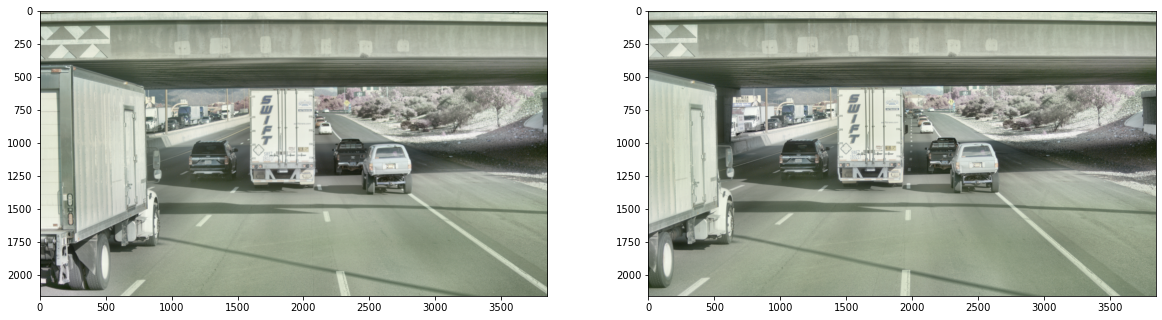

In [18]:
fig,axes = plt.subplots(1,2,figsize=(20,30))
axes[0].imshow(left_rgb[:,:,::-1])
axes[1].imshow(right_rgb[:,:,::-1])
fig.show()

In [23]:
right_paths

['/nas/EOS/dataset/torc/wk2/fixed_structure/CAPT-194/afternoon-CAPT-194_20211116170146/ar0820/image1/frame_image0_00030221.raw']

In [25]:
right_fid

'image1/frame_image0_00030221'